<a href="https://colab.research.google.com/github/laisan86/sklearn/blob/main/Python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E8%88%87%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E6%87%89%E7%94%A8%E7%8F%AD_%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20230703

Iris Classification

準備資料量 正比於 問題難易度(因子數量，也就是欄位多寡)
1. 機器學習大多千到萬
2. 深度學習至少上萬到十萬

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
import pandas as pd
data=pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
data["ans"]=iris["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#將資料分成訓練與測試用的兩群
from sklearn.model_selection import train_test_split

x = data.drop("ans", axis=1)
y = data["ans"]

In [4]:
#能確定切割的時候，繼續保留原本的位置對應
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

20230705

In [5]:
from sklearn.tree import DecisionTreeClassifier

'''
clf = DecisionTreeClassifier()  #用預設的參數
                  #模型好不好，就在這裡改參數讓訓練效果提升
'''
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)     #拿x_train跟y_train來訓練

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

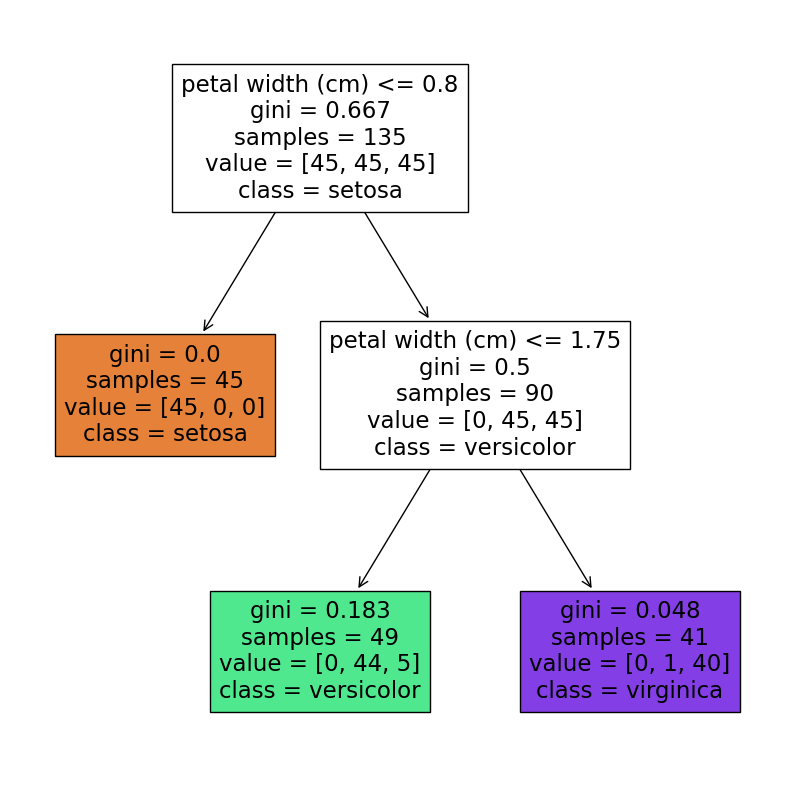

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10,10])
plot_tree(clf, feature_names=x.columns, class_names=iris["target_names"], filled=True)

In [7]:
from sklearn.metrics import accuracy_score

#電腦模擬考
pre = clf.predict(x_test)

#對答案
accuracy_score(y_test, pre)

1.0

預測患有糖尿病的機率

In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
data = pd.DataFrame(data=diabetes["data"], columns=diabetes["feature_names"])
data["ans"] = diabetes["target"]
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [10]:
#將資料分成訓練與測試用的兩群
from sklearn.model_selection import train_test_split

x = data.drop("ans", axis=1)
y = data["ans"]

In [11]:
#能確定切割的時候，繼續保留原本的位置對應
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)     #拿x_train跟y_train來訓練

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.9, 's5 <= 4.824\nsquared_error = 6116.924\nsamples = 397\nvalue = 151.232'),
 Text(0.25, 0.7, 'bmi <= 26.85\nsquared_error = 4134.52\nsamples = 258\nvalue = 119.915'),
 Text(0.125, 0.5, 's3 <= 55.5\nsquared_error = 2478.146\nsamples = 189\nvalue = 101.788'),
 Text(0.0625, 0.3, 's2 <= 173.6\nsquared_error = 3100.084\nsamples = 105\nvalue = 115.8'),
 Text(0.03125, 0.1, 'squared_error = 2844.949\nsamples = 103\nvalue = 113.359'),
 Text(0.09375, 0.1, 'squared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.1875, 0.3, 's3 <= 98.5\nsquared_error = 1148.556\nsamples = 84\nvalue = 84.274'),
 Text(0.15625, 0.1, 'squared_error = 1072.785\nsamples = 83\nvalue = 83.241'),
 Text(0.21875, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 170.0'),
 Text(0.375, 0.5, 'bp <= 97.5\nsquared_error = 5306.391\nsamples = 69\nvalue = 169.565'),
 Text(0.3125, 0.3, 'age <= 26.5\nsquared_error = 2964.568\nsamples = 38\nvalue = 140.105'),
 Text(0.28125, 0.1, 'squared_error = 784.0\nsamples = 2\nv

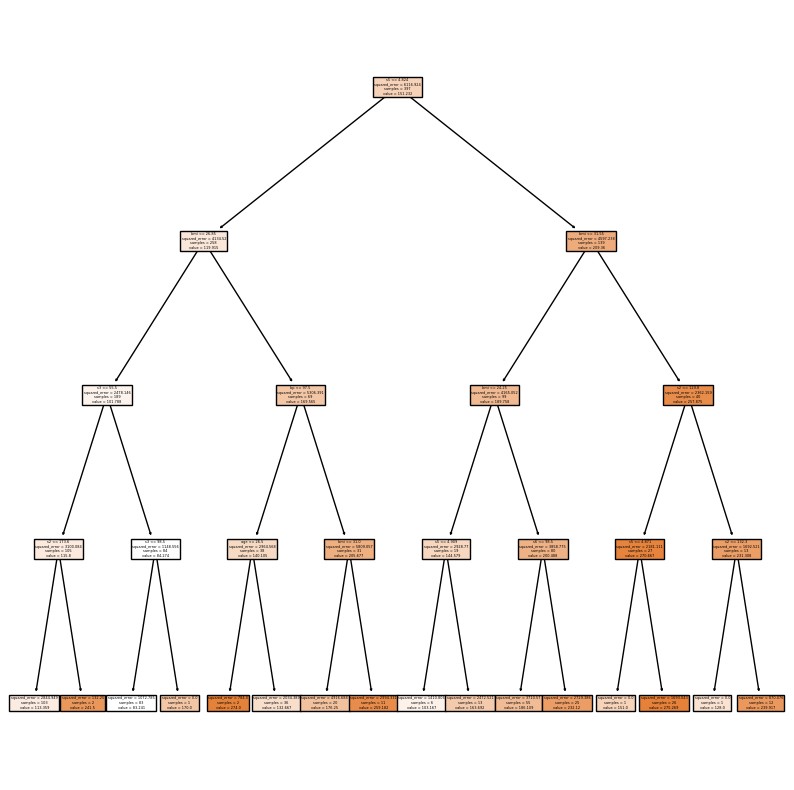

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10,10])
plot_tree(reg, feature_names=x.columns, class_names=iris["target_names"], filled=True)

In [42]:
#電腦模擬考
pre = reg.predict(x_test)
pre

array([239.91666667, 113.3592233 , 132.66666667, 232.12      ,
       113.3592233 , 186.10909091, 113.3592233 , 113.3592233 ,
       186.10909091,  83.24096386, 113.3592233 ,  83.24096386,
       176.25      ,  83.24096386,  83.24096386, 113.3592233 ,
       186.10909091, 186.10909091, 186.10909091, 113.3592233 ,
       186.10909091, 113.3592233 , 163.69230769, 239.91666667,
        83.24096386, 186.10909091,  83.24096386, 113.3592233 ,
       113.3592233 , 113.3592233 , 186.10909091, 186.10909091,
       113.3592233 , 232.12      , 259.18181818, 132.66666667,
       232.12      , 176.25      , 232.12      , 186.10909091,
       232.12      , 113.3592233 , 176.25      , 232.12      ,
       132.66666667])

20230710

In [43]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.05241985309155195

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x, y, scoring="r2", cv=10, n_jobs=-1)
print(scores)
import numpy as np
print(np.average(scores))

[0.22141646 0.22140442 0.22803328 0.47180757 0.21802868 0.5615236
 0.38921616 0.05408302 0.18298856 0.19064669]
0.27391484383257425
